In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
grantham_distance_path = os.path.abspath("../")
sys.path.append(grantham_distance_path)

import constants
import grantham_distance as gd

# Example of loading the HLA_allele map and Grantham Distance Calculator

In [2]:
class_I_allele_map = gd.HLAAlleleSequenceMapping(constants.HLA_CLASS_I_ALLELE_AMINO_ACID_SEQUENCES_ABS_PATH)

In [3]:
grantham_distance = gd.GranthamDistance(constants.GRANTHAM_DISTANCE_MATRIX_PATH)

sequence_1, sequence_2 = class_I_allele_map._map(['A*01:01', 'A*01:06'])
grantham_distance.sequence_pair_distance(sequence_1, sequence_2)

3.1875

# Use Example

In [4]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("tab10")
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
distances = {"A": [], "B":[], "C":[]}

for loci in distances:
    alleles = [allele for allele in class_I_allele_map.HLA_allele_AA_mapping if allele.startswith(loci)]
    allele_pairs = list(itertools.combinations(alleles, 2))
    
    for pair in allele_pairs:
        distances[loci].append(grantham_distance.sequence_pair_distance(*class_I_allele_map._map(pair)))

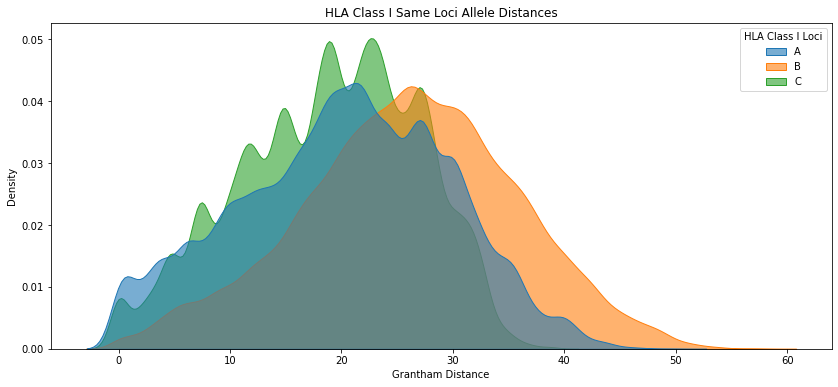

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
i = 0
for loci in distances:
    median = np.nanmedian(distances[loci])
    ax = sns.kdeplot(distances[loci], shade=True, bw_method=.1, alpha=.6, ax=ax,
                     label=loci, palette="tab10", zorder=i)
    i -= 1

ax.set_xlabel("Grantham Distance")
ax.set_ylabel("Density")
ax.legend(title="HLA Class I Loci")
ax.set_title("HLA Class I Same Loci Allele Distances")
fig.savefig(os.path.join(constants.COVER_PLOTS_PATH, "HLA_loci_distances.png"), facecolor="#fffffe")